In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def bootstrap(equity_train: np.array, equity_test: np.array, time: np.array):

    # compute returns
    returns_train = np.diff(equity_train)/equity_train[:-1]
    returns_test = np.diff(equity_test)/equity_test[:-1]

    fig, axs = plt.subplots(1, 1, figsize=(15, 5))
    
    # sampling
    sample = np.random.choice(returns_train, size=(len(returns_test)+1, 250)) + 1
    sample = np.cumprod(sample, axis=0) * equity_train[-1]
    
    # compute percentiles
    mean_percentile = np.percentile(sample, 50, axis=1)
    upper_percentile = np.percentile(sample, 95, axis=1)
    lower_percentile = np.percentile(sample, 5, axis=1)
    
    # plotting the backtest
    axs.plot(time, np.concatenate((equity_train, equity_test)),
                color='b', label='Equity Curve')
    axs.plot(time[-len(mean_percentile):], mean_percentile,
                color='y', label='Median')
    axs.plot(time[-len(upper_percentile):], upper_percentile,
                color='r', label='90% Confidence Interval')
    axs.plot(time[-len(lower_percentile):], lower_percentile,
                color='r')
    axs.plot(time[-len(equity_test):], equity_test, color='b',
                label='Equity Curve')

    axs.grid(True)
    axs.set_ylim([0, 1.1*upper_percentile.max()])
    axs.legend()

    plt.savefig('./bootstraping_plot.png', dpi=300)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/tmp/ipykernel_16006/671015295.py:21: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs.plot(time[-len(mean_percentile):], mean_percentile,
/tmp/ipykernel_16006/671015295.py:23: FutureWarning: The behavi

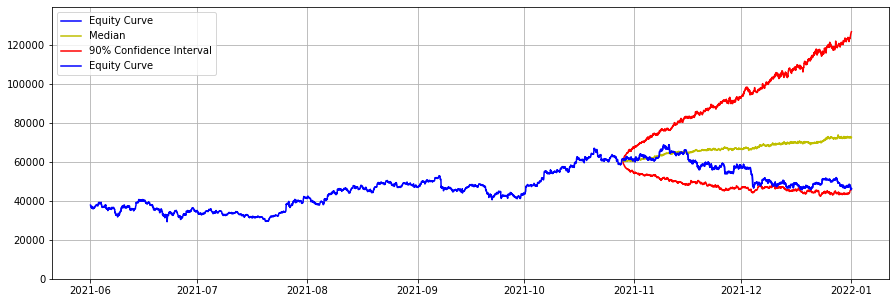

In [6]:
train_test_split = 0.7

df = pd.read_csv('./data/Binance_Futures/BTCBUSD/1h.csv')
df['close time'] = pd.to_datetime(df['close time'], unit='ms')
df = df[df['close time'] >= '2021-06-01']
df = df[df['close time'] <= '2022-01-01']
time = df['close time']

train_idx = round(len(df) * train_test_split)
equity_train = df['close'].iloc[:train_idx].to_numpy()
equity_test = df['close'].iloc[train_idx:].to_numpy()

bootstrap(equity_train, equity_test, time)

<Figure size 432x288 with 0 Axes>